# Distribution des naissances das le temps
Dans ce carnet est proposée une analyse de la dstribution dans le temps des années de naissance des militant.es et la mise en évidence de générations.
De plus, la proportion des genres dans l'implciation militante sera aussi mise en évidence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data = pd.read_csv("personne_wiki_import.csv")

In [3]:
display(data)

,item,itemLabel,year,genre,genreLabel
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,1816,http://www.wikidata.org/entity/Q6581072,female
1,http://www.wikidata.org/entity/Q20980160,Emma Isler,1816,http://www.wikidata.org/entity/Q6581072,female
2,http://www.wikidata.org/entity/Q94772529,Amalie Krüger,1816,http://www.wikidata.org/entity/Q6581072,female
3,http://www.wikidata.org/entity/Q255221,Táhirih,1817,http://www.wikidata.org/entity/Q6581072,female
4,http://www.wikidata.org/entity/Q43302262,Violante Atabalipa Ximenes de Bivar e Vellasco,1817,http://www.wikidata.org/entity/Q6581072,female
...,...,...,...,...,...
6912,http://www.wikidata.org/entity/Q110101013,Melanie Berentz,1999,http://www.wikidata.org/entity/Q6581072,female
6913,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,1999,http://www.wikidata.org/entity/Q6581072,female
6914,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,1999,http://www.wikidata.org/entity/Q1052281,trans woman
6915,http://www.wikidata.org/entity/Q107037238,Zhiar Ali,1999,http://www.wikidata.org/entity/Q6581097,male


# Premier graphique sur l'année de naissance et le nombre de personnes


In [5]:
# l'année de naissance est déjà de type int donc pas besoin de changer le type de la donnée
data["year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6917 entries, 0 to 6916
Series name: year
Non-Null Count  Dtype
--------------  -----
6917 non-null   int64
dtypes: int64(1)
memory usage: 54.2 KB


In [6]:
data.dtypes

item          object
itemLabel     object
year           int64
genre         object
genreLabel    object
dtype: object

In [7]:
data["year"].count()


6917

In [8]:
annee_eff= pd.DataFrame(data[data['year'] < 2001].groupby('year').size())\
                .reset_index(drop=False)
annee_eff.columns=['year','effectif']
annee_eff

,year,effectif
0,1816,3
1,1817,4
2,1818,6
3,1819,5
4,1820,4
...,...,...
179,1995,39
180,1996,30
181,1997,23
182,1998,24


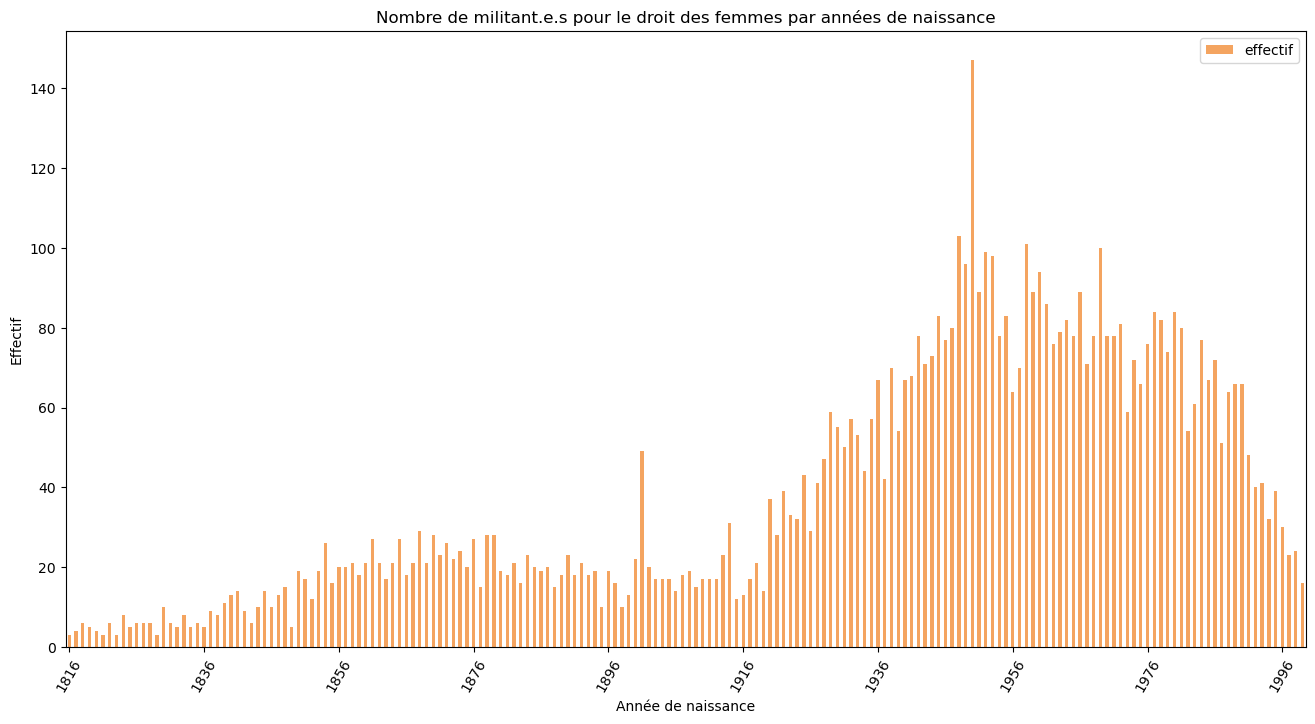

In [9]:
# Premier graphique
graph1 = annee_eff.plot(x="year", y="effectif", kind= "bar",rot=60, fontsize=10, figsize=(16,8),color=['sandybrown'])


max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
graph1.xaxis.set_major_locator(xloc)

plt.ylabel('Effectif')
plt.xlabel('Année de naissance')
plt.title("Nombre de militant.e.s pour le droit des femmes par années de naissance")
plt.show()

## Code pour faire un graphique par génération

In [10]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
cdf_p = data[data['year'] < 2001].copy(deep=True)

In [11]:
cdf_p.head(3)

,item,itemLabel,year,genre,genreLabel
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,1816,http://www.wikidata.org/entity/Q6581072,female
1,http://www.wikidata.org/entity/Q20980160,Emma Isler,1816,http://www.wikidata.org/entity/Q6581072,female
2,http://www.wikidata.org/entity/Q94772529,Amalie Krüger,1816,http://www.wikidata.org/entity/Q6581072,female


In [12]:
### Année minimale et maximale dans la population
min(cdf_p['year']), max(cdf_p['year'])

(1816, 1999)

In [13]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_25 = list(range(1816, 2017, 25))
l_25[:5],l_25[-5:]

([1816, 1841, 1866, 1891, 1916], [1916, 1941, 1966, 1991, 2016])

In [14]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

cdf_p['periodes'] = pd.cut(cdf_p['year'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['periodes'] = cdf_p['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,item,itemLabel,year,genre,genreLabel,periodes
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840
1,http://www.wikidata.org/entity/Q20980160,Emma Isler,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840
2,http://www.wikidata.org/entity/Q94772529,Amalie Krüger,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840


In [18]:
cdf_p[cdf_p.year == 1999][:3]

,item,itemLabel,year,genre,genreLabel,periodes
6901,http://www.wikidata.org/entity/Q105622678,Samantha Hudson,1999,http://www.wikidata.org/entity/Q48270,non-binary,1991-2015
6902,http://www.wikidata.org/entity/Q117455951,Nissa Bek,1999,http://www.wikidata.org/entity/Q6581072,female,1991-2015
6903,http://www.wikidata.org/entity/Q112651488,Pierrick Berteloot,1999,http://www.wikidata.org/entity/Q6581097,male,1991-2015


In [19]:
### compter les naissances par périodes de 25 ans
cdf_p.groupby(by='periodes').size()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/3799892700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdf_p.groupby(by='periodes').size()


periodes
1816-1840     154
1841-1865     418
1866-1890     542
1891-1915     469
1916-1940    1069
1941-1965    2142
1966-1990    1830
1991-2015     293
dtype: int64

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/4144223239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']


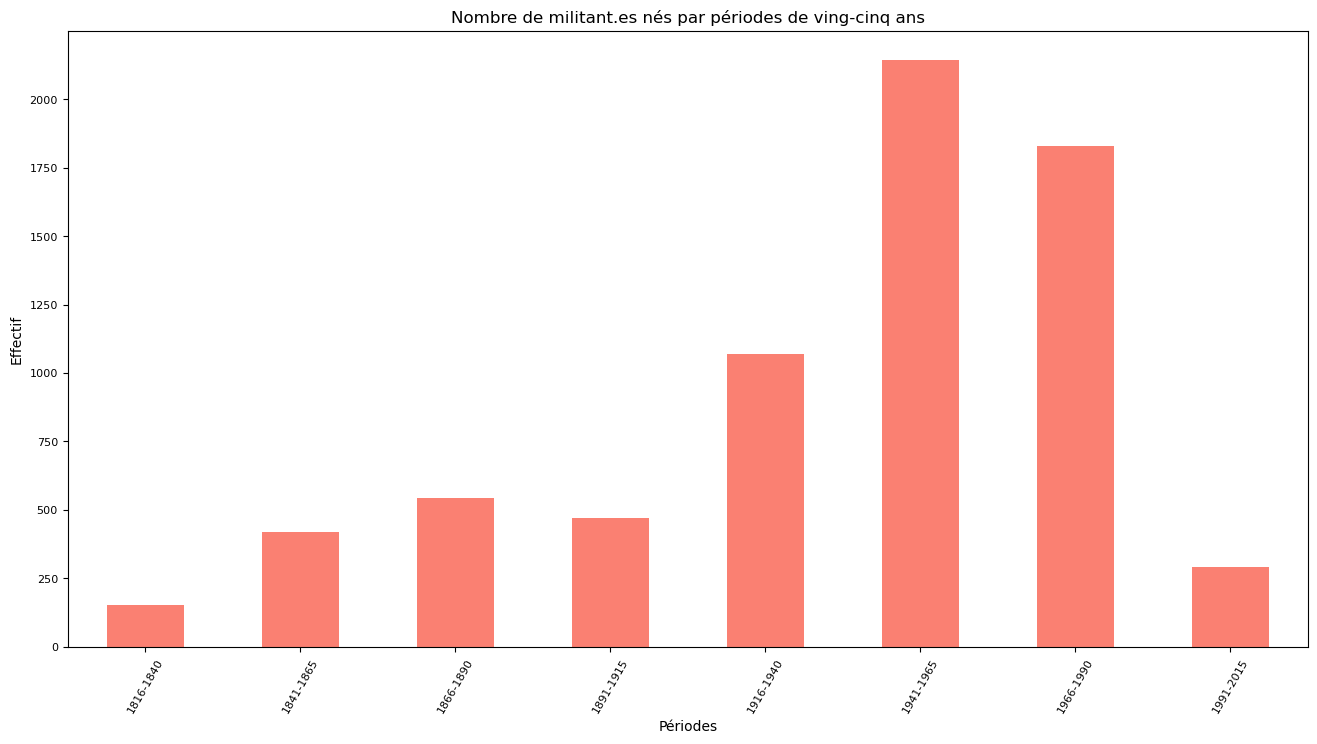

In [20]:
ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']
)
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de militant.es nés par périodes de ving-cinq ans')
plt.show()

## Représentation par genre

In [21]:
### Regrouper et compter avec un fitre sur le genre féminin
# Je ne sais pas pourquoi y a des générations qui disparaissent !!!!
gender_m = pd.DataFrame(cdf_p[cdf_p.genreLabel == 'female'].groupby('periodes').size())
gender_m.columns = ['gen_f']
gender_m.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/3251164921.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m = pd.DataFrame(cdf_p[cdf_p.genreLabel == 'female'].groupby('periodes').size())


,gen_f
periodes,
1891-1915,364
1916-1940,633
1941-1965,1115
1966-1990,948
1991-2015,154


In [24]:
### Regrouper et compter avec un fitre sur le genre masculin
gender_f = pd.DataFrame(cdf_p[cdf_p.genreLabel == 'male'].groupby('periodes').size())
gender_f.columns = ['gen_m']
gender_f.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/658440589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f = pd.DataFrame(cdf_p[cdf_p.genreLabel == 'male'].groupby('periodes').size())


,gen_m
periodes,
1891-1915,101
1916-1940,423
1941-1965,929
1966-1990,681
1991-2015,77


In [25]:
### Fusionner les deux tableaux en utilisant l'index comme clé de jointure
merged = pd.merge(gender_m, gender_f, left_index=True, right_index=True)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,364,101
1916-1940,633,423
1941-1965,1115,929
1966-1990,948,681
1991-2015,154,77


In [26]:
### Transformer l'index de séquence à chaîne de caractères
# ce qui est indispensable pour l'affichage dans un graphique
merged.index = merged.index.map(str)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,364,101
1916-1940,633,423
1941-1965,1115,929
1966-1990,948,681
1991-2015,154,77


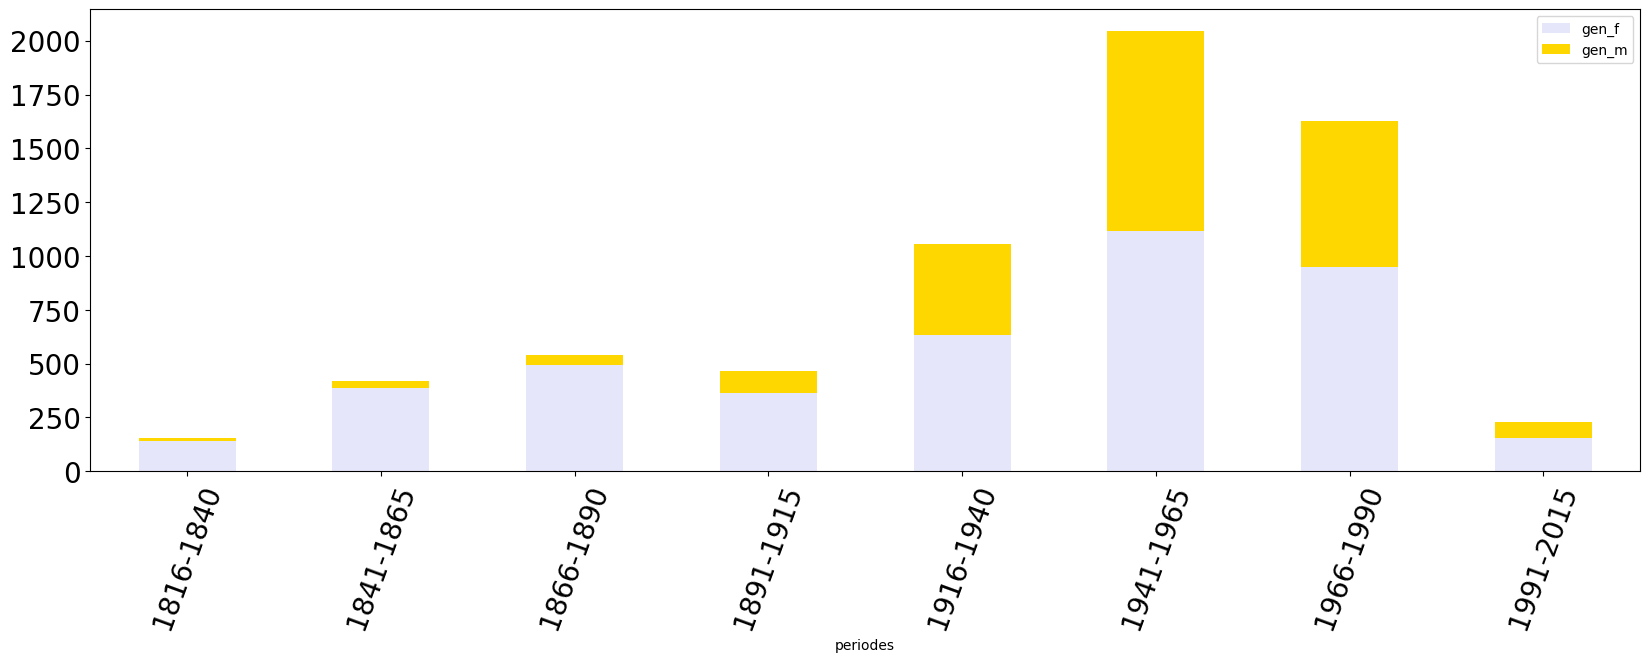

In [27]:
ax = merged.plot.bar(stacked=True, rot=70, fontsize=20, figsize=(20,6), color=['lavender', 'gold'])
plt.show()

# Commentaire
Bizarrement tout s'affiche

In [28]:
l_10 = list(range(1816, 2007, 10))
l_10[:5],l_10[-5:]

([1816, 1826, 1836, 1846, 1856], [1966, 1976, 1986, 1996, 2006])

In [29]:

cdf_p['per_10'] = pd.cut(cdf_p['year'], l_10, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['per_10'] = cdf_p['per_10'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,item,itemLabel,year,genre,genreLabel,periodes,per_10
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840,1816-1825
1,http://www.wikidata.org/entity/Q20980160,Emma Isler,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840,1816-1825
2,http://www.wikidata.org/entity/Q94772529,Amalie Krüger,1816,http://www.wikidata.org/entity/Q6581072,female,1816-1840,1816-1825


In [30]:
### On regroupe par genre comme ci-dessus
## Même problème qu'avant ? des périodes disparaissent !!!!!
gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.genreLabel == 'female') & (cdf_p.year > 1815)].groupby('per_10').size())
gender_m_10.columns = ['gen_f']
gender_m_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/1621639571.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.genreLabel == 'female') & (cdf_p.year > 1815)].groupby('per_10').size())


,gen_f
per_10,
1956-1965,403
1966-1975,383
1976-1985,390
1986-1995,270
1996-2005,59


In [31]:
### Idem
gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.genreLabel == 'male')& (cdf_p.year > 1815)].groupby('per_10').size())
gender_f_10.columns = ['gen_m']
gender_f_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13585/996270405.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.genreLabel == 'male')& (cdf_p.year > 1815)].groupby('per_10').size())


,gen_m
per_10,
1956-1965,370
1966-1975,329
1976-1985,258
1986-1995,151
1996-2005,20


In [32]:
merged_10 = pd.merge(gender_m_10, gender_f_10, left_index=True, right_index=True)
merged_10.tail()

,gen_f,gen_m
per_10,,
1956-1965,403,370
1966-1975,383,329
1976-1985,390,258
1986-1995,270,151
1996-2005,59,20


In [35]:
### On transforme le type de valeur de l'index
# et on ajoute une colonne avec le total
merged_10.index = merged_10.index.map(str)
merged_10['tot']=merged_10['gen_f']+merged_10['gen_m']
merged_10.tail()

,gen_f,gen_m,tot
per_10,,,
1956-1965,403,370,773
1966-1975,383,329,712
1976-1985,390,258,648
1986-1995,270,151,421
1996-2005,59,20,79


In [36]:
### On prépare les valeurs pour l'affichage des fréquences (proportion par rapport au total)

# liste qui contient toutes les valeurs à la suite
m_m = merged_10.gen_f.to_list()+merged_10.gen_m.to_list()

# liste d'égale longueur que la précédente qui contient 
# les valeurs de l'index, i.e. les périodes
tot = merged_10.tot.to_list()*2

# liste qui contient les valeurs des fréquences
lp = [round(v/t, 2) for v,t in zip(m_m, tot)]
lp[:3]

[0.87, 0.97, 0.92]

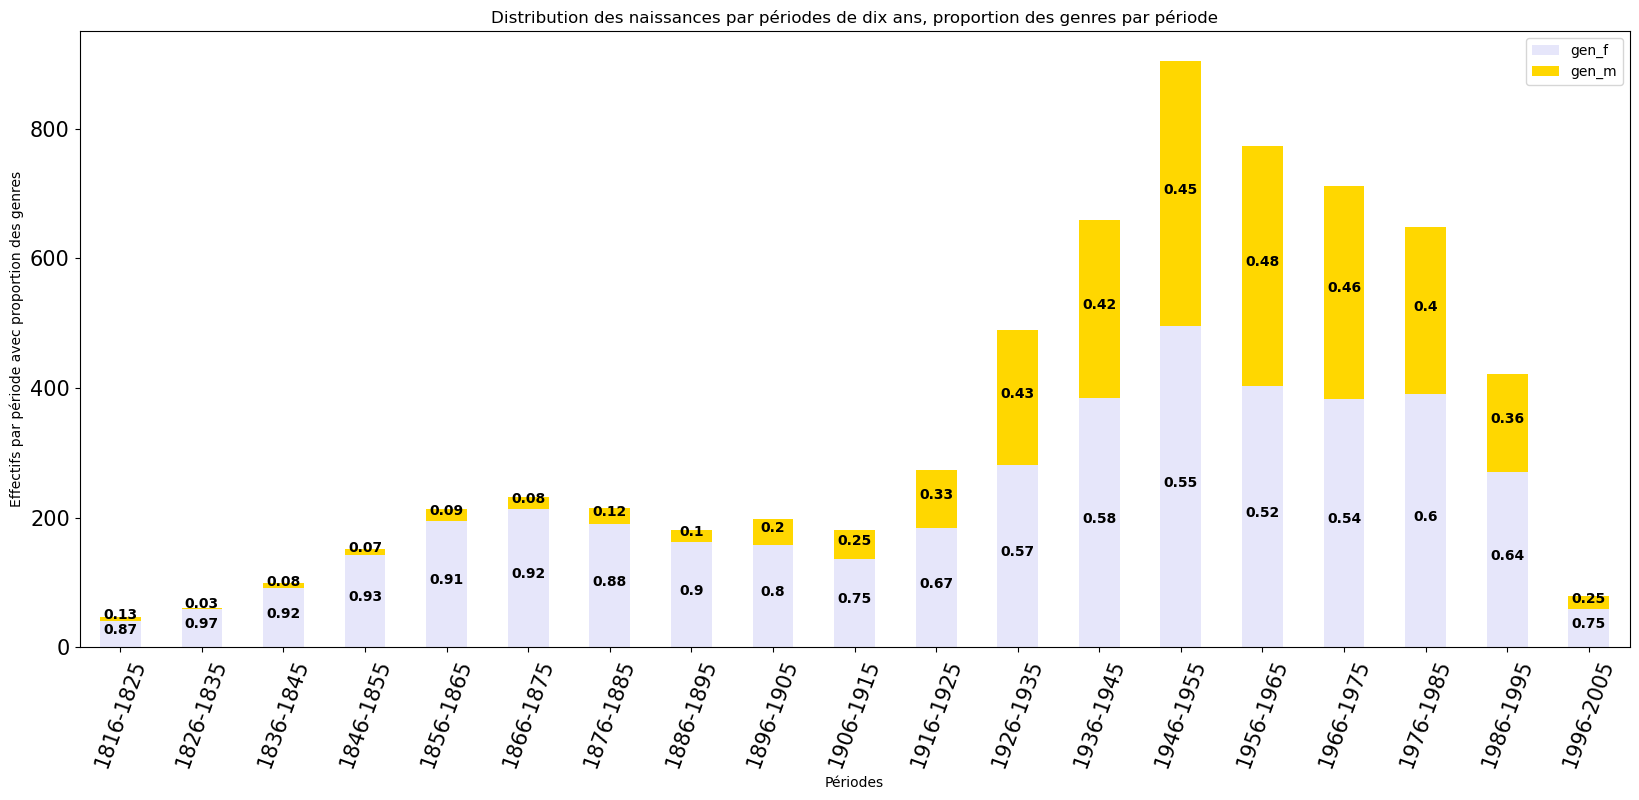

In [37]:
### Graphique avec la distribution par période et genre (M,F)
# Noter que les effectifs du genre 'Autres' étant très faibles,
# on ne les analyse pas de manière sérielle mais on peut les analyser qualitatiement

ax = merged_10.plot.bar(stacked=True, y=['gen_f', 'gen_m'], \
                        rot=70, fontsize=15, figsize=(20,8), color=['lavender', 'gold'])


### https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/


## On ajoute une étiquette concernant la valeur de fréquence
# à chaque rectangle dans le graphe, en utilisant la list 'lp' préparée précédemment
# Il y a autant de triangles que les valeurs d'index x le nombre de variables

for bar,v in zip(ax.patches,lp): 

    ax.text(
      # Met les étiquette aux centre des rectangles
      bar.get_x() + bar.get_width() / 2,
        
      # Ajoute les coordonnées verticales
      bar.get_height()/2 + bar.get_y(), 
      
      # Ajoute les valeurs
      v,

      # centre et met du style aux étiquettes
      ha='center',
      color='black',
      weight='bold',
      size=10
  )

plt.ylabel('Effectifs par période avec proportion des genres')
plt.xlabel('Périodes')
plt.title('Distribution des naissances par périodes de dix ans, proportion des genres par période')


plt.show()

# Commentaire
Bizarrement les bonnes périodes s'affichent